Last modified Jul. 24, 2020 by Luis Valdivia

In [6]:
# we will need these eventually
import matplotlib.pyplot as plt 
import numpy as np
import math
import cmath

# 1.

Checking the implementation, (1) is the right equation.

For reference:
https://numpy.org/doc/stable/reference/routines.fft.html

# 2. 

Checking the implementation, (5) is the right equation.

For reference:
https://numpy.org/doc/stable/reference/routines.fft.html 

# 3. 

Suppose $f_j$ is real for $j = 0, \dots, N-1$. From problem 1,

$$c_k = \sum_{j=0}^{N-1} f_j e^{-i2\pi k j/N}. $$

If $k =0$, $e^{-i2\pi k j/N} = e^0 = 1$, so we get

$$ c_0 = \sum_{j=0}^{N-1} f_j, $$ 

which is the sum of real numbers, and since the reals are closed under addition, $c_0$ must be real. 

For the second part of the proof, substitute $N-k$ for $k$ into the equation for $c_k$ to get

$$c_{N-k} = \sum_{j=0}^{N-1} f_j e^{-i2\pi (N-k) j/N} $$

$$ = \sum_{j=0}^{N-1} f_j e^{i2\pi (k/N - 1) j} $$

$$ = \sum_{j=0}^{N-1} f_j e^{i2\pi k j / N} e^{-i2\pi j}. $$

Since $j$ is an integer, $e^{-i2\pi j} = 1$, so we get

$$ c_{N-k} = \sum_{j=0}^{N-1} f_j e^{i2\pi k j / N}. $$

Call that equation (i). Now we compute $\overline{c_k}$. Recall that complex conjugation distributes over addition and multiplication so 

$$ \overline{c_k} = \overline{\sum_{j=0}^{N-1} f_j e^{-i2\pi k j/N}} $$

$$  = \sum_{j=0}^{N-1} \overline{f_j e^{-i2\pi k j/N}} $$

$$  = \sum_{j=0}^{N-1} \overline{f_j} \overline{e^{-i2\pi k j/N}} $$

$$  = \sum_{j=0}^{N-1} \overline{f_j} e^{i2\pi k j/N} $$

and since the reals are invariant under complex conjugation,

$$  = \sum_{j=0}^{N-1} f_j e^{i2\pi k j/N}. $$

This is precisely the same as equation (i), so $c_{N-k} = \overline{c_k}$.

# 4. 

Comparing the coefficients we see that $a_k = \frac{2}{N} Re(c_k)$ for $k = 0,\dots \frac{N}{2}$ and $b_k = \frac{-2}{N} Im(c_k)$ for $k = 1,\dots \frac{N}{2} - 1$. We implement code to extract $a_k$ and $b_k$ from $c_k$ below.

In [7]:
# INPUT: periodic array f_j
# OUTPUT: real Fourier coefficients, a_k and b_k
def fft_poly(fj):
    ak = []
    bk = []
    ck = np.fft.fft(fj)
    ak.append(2 * ck[0].real / len(fj))
    for i in range(1, len(fj)//2):
        ak.append(2 * ck[i].real / len(fj))
        bk.append(-2 * ck[i].imag / len(fj))
    ak.append(2 * ck[len(fj)//2].real / len(fj))
    print("a_k = ", ak)
    print("b_k = ", bk)

# 5.

We load in our data and get the coefficients

In [8]:
fj = [6.000000000000000, 10.242640687119284, 2.000000000000000, -2.585786437626905, 2.000000000000000, 1.757359312880716, -6.000000000000000, -5.414213562373098]

fft_poly(fj)

a_k =  [1.9999999999999991, 1.9999999999999991, 3.0, 8.881784197001252e-16, 8.881784197001252e-16]
b_k =  [4.0, 5.000000000000001, -0.0]


So we get that(we ignore the tiny coefficients) 

$$P_8(x) = \frac{2}{2} + \sum_{k=1}^{3} (a_k \cos kx + b_k \sin kx) + \frac{0}{2} \cos 4x $$

$$ = 1 + 2 \cos x + 4 \sin x
+ 3 \cos 2x + 5 \sin 2x
+ 0 \cos 3x + 0 \sin 3x$$

$$ = 1 + 2 \cos x + 4 \sin x + 3 \cos 2x + 5 \sin 2x.$$

If we want to graph it,

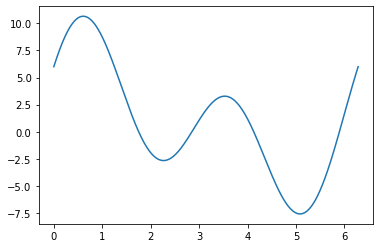

In [9]:
x_val = []
y_val = []
for i in range(501):
    x_val.append(2.0 * math.pi * i / 500)
    y_val.append(1 + 2 * math.cos(x_val[i]) + 4 * math.sin(x_val[i]) + 3 * math.cos(2 * x_val[i]) + 5 * math.sin(2 * x_val[i]))
plt.plot(x_val, y_val)

# 6.

We edit our previous Fourier coefficient calculator by recalling that the coefficients for the first derivative are $i k c_k$.

In [10]:
# INPUT: periodic array f_j
# OUTPUT: real Fourier coeffcients, a_k and b_k
def fft_prime_poly(fj):
    ak = []
    bk = []
    ck = np.fft.fft(fj)
    ak.append(0)
    for i in range(1, len(fj)//2):
        ak.append(2 * (ck[i] * i * 1j).real / len(fj))
        bk.append(-2 * (ck[i] * i * 1j).imag / len(fj))
    ak.append(2 * (ck[len(fj)//2] * len(fj)//2 * 1j).real / len(fj))
    print("a_k = ", ak)
    print("b_k = ", bk) 

We define the function $f$ that we will be working with.

In [11]:
# INPUT: real-valued x
# OUTPUT: e^sin(x)
def e_sin(x):
    return math.exp(math.sin(x))

We compute the nodes and $f$ evaluated at those nodes, storing the values. Then using the later we get the coefficients $a_k$ and $b_k$.

In [12]:
fj = []
xj = []

for i in range(8):
    xj.append(2 * math.pi * i / 8)
    fj.append(e_sin(xj[i]))

fft_prime_poly(fj)

a_k =  [0, 1.1303214174582041, -2.220446049250313e-16, -0.13463932855679173, 0.0]
b_k =  [1.1102230246251565e-16, 0.5430806348152437, -0.0]


Now we compute the actual error. To do so, we calculate $f'(x) = \cos x e^{\sin x} = \cos x f(x)$, so we can reuse the $fj$ values. From this, we subtract $P_8(x_j)$.

In [13]:
for i in range(len(xj)):
    print((math.cos(xj[i]) * fj[i]) - 1.1303214174582041 * math.cos(xj[i]) + 0.13463932855679173 * math.cos(3 * xj[i]) - 0.5430806348152437 * math.sin(2 * xj[i]))

0.00431791109858759
-0.003449099708283332
5.993492201241094e-18
0.003449099708283221
-0.0043179110985876795
0.00272947135040269
1.473226077804521e-17
-0.00272947135040269


# 7.

# a.

We create another function for computing the derivative at a node.

In [14]:
# INPUT: periodic array f_j
# OUTPUT: f' evaluated at the nodes
def fft_prime_2(fj):
    ck = np.fft.fft(fj)
    for k in range(len(fj)//2):
        ck[k] = (ck[k] * k * 1j)
    for k in range(len(fj)//2, len(fj)):
        ck[k] = (ck[k] * (k - len(fj)) * 1j)   # N/2 will be 0  
    return (np.fft.ifft(ck).real)

# b.

We now test it by comparing calculating the error.

In [15]:
fpj = []
fj = []
xj = []

for i in range(8):
    xj.append(2 * math.pi * i / 8)
    fj.append(e_sin(xj[i]))
    fpj.append(math.cos(xj[i]) * e_sin(xj[i]))

for i in range(len(xj)):
    print((fpj[i]) - fft_prime_2(fj)[i])

0.004317911098587812
-0.003449099708283443
-1.6662015036740776e-16
0.003449099708283221
-0.00431791109858759
0.002729471350402801
-1.7860065947792422e-16
-0.0027294713504027457


Scrolling up, we see that the errors are mostly similar, differing more with the smallest values.

# c.

Now we observe what happens with $N = 16$.

In [20]:
fpj = []
fj = []
xj = []

for i in range(16):
    xj.append(2 * math.pi * i / 16)
    fj.append(e_sin(xj[i]))
    fpj.append(math.cos(xj[i]) * e_sin(xj[i]))

rem = []
for i in range(len(xj)):
    rem.append(abs((fpj[i]) - fft_prime_2(fj)[i]))
    
print(max(rem))

1.761893129170744e-07


Lastly, we look at $N = 32$.

In [19]:
fpj = []
fj = []
xj = []

for i in range(32):
    xj.append(2 * math.pi * i / 32)
    fj.append(e_sin(xj[i]))
    fpj.append(math.cos(xj[i]) * e_sin(xj[i]))

rem = []
for i in range(len(xj)):
    rem.append(abs((fpj[i]) - fft_prime_2(fj)[i]))
print(max(rem))

3.4416913763379853e-15


As we doubled $N$, the error shrunk significantly. The first two terms are practically indistinguishable in the $N=32$ case, and most errors are close to $1 \times 10^{-15}$. Even in the $N = 16$ case, the errors were already small enough for most practical usage.